# Análisis de bienestar en México
## Con datos obtenidos por INEGI
Así como en el ejercicio que se nos dio, se analizarán algunos indicadores que se reflejan en México y se análizara su relación con los estados en México.

In [1]:
import numpy as np
import pandas as pd

# url_csv = 'https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0&output=csv'

bienestar_df = pd.read_csv("indicadores_bienestar_2014.csv", index_col = 0, thousands  = ',')
bienestar_df.index.names = ['Entidad']
bienestar_df.columns.names = ['Indicadores']

Los indicadores de interés son los siguientes y se búsca una relación entre el acceso a los servicios públicos y otros indicadores en México.

In [2]:
bienestar_df = bienestar_df[1:] # Ignorar 'Estados unidos mexicanos
columnas = ['Acceso a servicios de salud',
           'Participación cívica y política',
           'Participación electoral',
           'Esperanza de vida al nacer',
           'Salud autorreportada',
           'Tasa de obesidad',
           'Niveles de educación',
           'Deserción escolar']
bienestar_df = bienestar_df[columnas]

In [3]:
bienestar_df.head()

Indicadores,Acceso a servicios de salud,Participación cívica y política,Participación electoral,Esperanza de vida al nacer,Salud autorreportada,Tasa de obesidad,Niveles de educación,Deserción escolar
Entidad,,,,,,,,
Aguascalientes,87.9,8.4,37.2,75.9,8.0,31.0,42.5,12.1
Baja California,80.6,4.1,30.9,74.2,8.5,39.5,44.8,19.3
Baja California Sur,84.9,3.0,52.6,76.2,8.4,43.6,48.4,11.7
Campeche,89.3,11.2,61.2,75.4,7.9,43.3,40.6,15.0
Coahuila de Zaragoza,87.2,6.5,45.0,76.0,8.2,37.1,42.9,19.1


In [4]:
bienestar_df.describe()

Indicadores,Acceso a servicios de salud,Participación cívica y política,Participación electoral,Esperanza de vida al nacer,Salud autorreportada,Tasa de obesidad,Niveles de educación,Deserción escolar
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,85.387500,7.096875,48.153125,75.221875,8.153125,34.065625,39.875000,13.100000
std,2.951517,3.002524,9.238000,0.958404,0.215503,5.247218,6.587917,4.188001
min,77.200000,1.700000,30.900000,73.000000,7.700000,25.400000,27.700000,2.800000
25%,84.400000,4.100000,41.675000,74.900000,8.075000,30.300000,35.425000,11.100000
50%,85.750000,7.450000,45.950000,75.500000,8.100000,33.300000,40.700000,13.000000
75%,87.275000,9.325000,55.575000,75.900000,8.250000,37.100000,43.100000,15.975000
max,90.900000,13.000000,70.900000,76.700000,8.500000,44.800000,58.800000,19.300000


In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=4)
pca.fit(bienestar_df)
bienestar_pca = pca.transform(bienestar_df)

bienestar_pca_df = pd.DataFrame(bienestar_pca)
bienestar_pca_df.index = bienestar_df.index
bienestar_pca_df.columns = ['CP_1', 'CP_2', 'CP_3', 'CP_4']

bienestar_pca_df.head()

,CP_1,CP_2,CP_3,CP_4
Entidad,,,,
Aguascalientes,-10.769060,1.981082,-2.079756,-0.778221
Baja California,-16.417348,8.691286,7.039314,-2.306827
Baja California Sur,5.952582,11.826557,2.713519,2.558316
Campeche,14.999773,2.530764,6.944728,0.505571
Coahuila de Zaragoza,-2.427343,4.146139,4.579533,-4.841711


In [7]:
print(pca.explained_variance_ratio_) 

[0.45919814 0.26245041 0.10804095 0.08926823]


#### Pregunta para contestar: ¿Cuanta varianza explica la primer componente principal? ¿Y la segunda? ¿Es una mucho mayor que la otra? ¿Que puede significar eso? ¿Se explica el 98 % de la varianza con ambas o no?

Un 45% de la varianza. un 26 % de la varianza. Son relativamente cercanas. No hay mucha diferencia entre las componentes. Ni con las 4 componentes llego al 98%

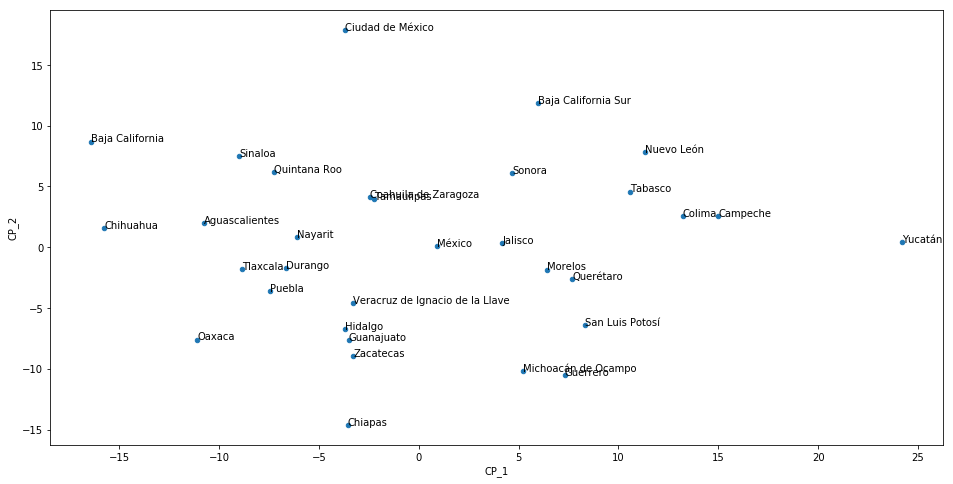

In [8]:
%matplotlib inline

ax = bienestar_pca_df.plot(kind='scatter', x='CP_1', y='CP_2', figsize=(16,8))

for i, pais in enumerate(bienestar_pca_df.index):
    ax.annotate(pais, (bienestar_pca_df.iloc[i].CP_1, bienestar_pca_df.iloc[i].CP_2))

Text(0.5,1,'Selección de K con el método del codo')

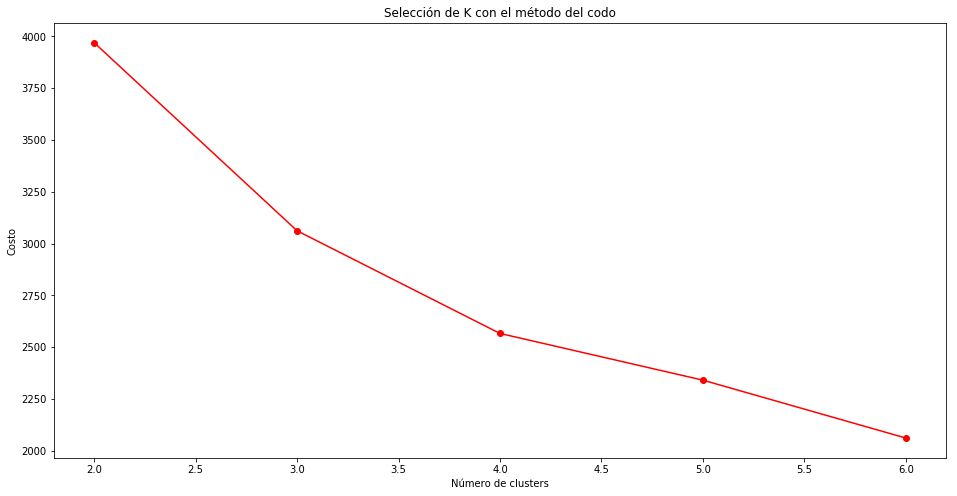

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

maxK = 6
listaK = range(2,maxK + 1)
costos=[]

for k in listaK:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(bienestar_df)
    costos.append(-kmeans.score(bienestar_df))
    
plt.figure(figsize=(16,8))
plt.plot(listaK, costos, '-or')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Selección de K con el método del codo')

#### Pregunta para contestar: ¿Cual fué el codo más pronunciado para tu caso particular?

Entre los codos de 3 y 4 pero como anteriormente use un 3 ahora usaré un 4

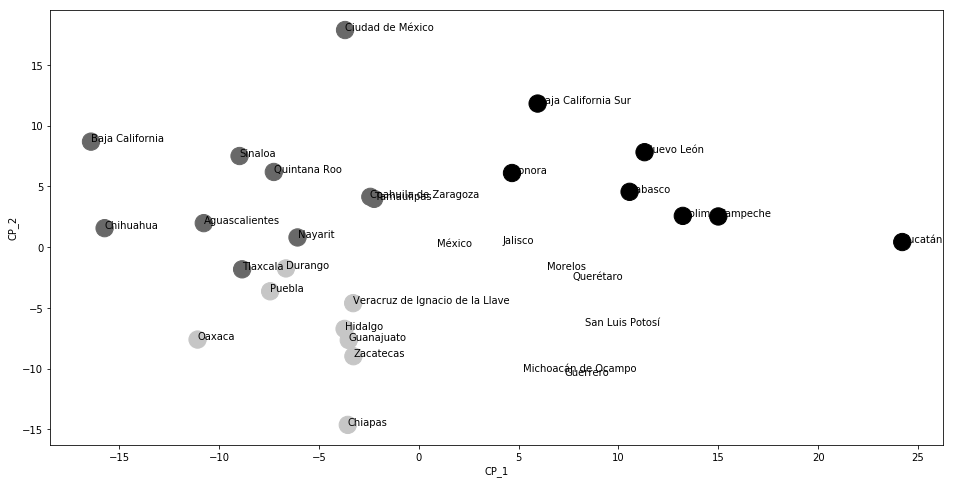

In [10]:
K = 4
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit(bienestar_df)
bienestar_pca_df['grupos'] = pd.Series(clusters.labels_, index=bienestar_pca_df.index)


ax = bienestar_pca_df.plot(kind='scatter', x='CP_1', y='CP_2', 
                     c=bienestar_pca_df.grupos.astype(float),
                     figsize=(16,8), s=300)

for i, pais in enumerate(bienestar_pca_df.index):
    ax.annotate(pais, (bienestar_pca_df.iloc[i].CP_1, bienestar_pca_df.iloc[i].CP_2))

In [11]:
prototipos_df = pd.DataFrame(kmeans.cluster_centers_)
prototipos_df.index = ['P'+str(i + 1) for i in range(K)]
prototipos_df.columns = bienestar_df.columns
prototipos_df.index.names = ['Porcentaje']
prototipos_df.columns.names = ['Indicador']

prototipos_df

Indicador,Acceso a servicios de salud,Participación cívica y política,Participación electoral,Esperanza de vida al nacer,Salud autorreportada,Tasa de obesidad,Niveles de educación,Deserción escolar
Porcentaje,,,,,,,,
P1,84.785714,6.842857,54.985714,75.057143,8.085714,29.414286,37.814286,12.514286
P2,84.862500,6.575000,43.600000,74.637500,8.062500,31.562500,32.687500,13.900000
P3,85.350000,6.660000,39.460000,75.420000,8.270000,34.500000,44.300000,12.500000
P4,86.642857,8.571429,58.942857,75.771429,8.157143,40.957143,43.828571,13.628571


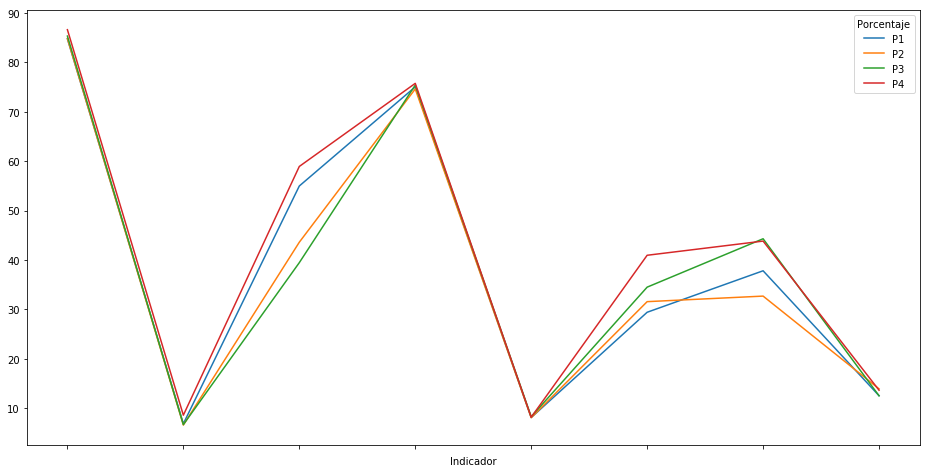

In [12]:
prototipos_df.T.plot(figsize=(16,8))

#### Pregunta para contestar: En función de las gráficas, da una explicación coherente a los diferentes prototipos y que puede significar (i.e. paises con mucha tuberculosis que van mejorando, paises que van empeorando en cuanto a casos de tuberculosis, paises que experimentaron un pico el año XXXX, etc...)
Extrapolando esta pregunta a los prototipos de los datos por INEGI, podemos mencionar que aquellos prototipos que sobresalen en alguno de los indicadores continuan sobresaliendo en el resto, en general suelen ser muy parecidos pero para aquellos indicadores como 